In [0]:
cd drive/My Drive/viem_phoi

/content/drive/My Drive/viem_phoi


In [0]:
cd ..

/content/drive/My Drive


In [0]:
cd kaggle

/content/drive/My Drive/kaggle


In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/kaggle"

In [0]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 42.3MB/s]
100% 2.29G/2.29G [00:32<00:00, 74.7MB/s]


In [0]:
!unzip chest-xray-pneumonia.zip && rm chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ches

In [0]:
train_dir = './chest_xray/train'
val_dir = './chest_xray/val'
test_dir = './chest_xray/test'

In [0]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
val_normal_dir = os.path.join(val_dir, 'NORMAL')
val_pneumonia_dir = os.path.join(val_dir, 'PNEUMONIA')

In [0]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 16
NUMBER_CLASSES = 2

In [0]:
num_train_normal = len(os.listdir(train_normal_dir))
num_train_pneumonia = len(os.listdir(train_pneumonia_dir))

num_val_normal = len(os.listdir(val_normal_dir))
num_val_pneumonia = len(os.listdir(val_pneumonia_dir))


In [0]:
print(num_train_normal)
print(num_train_pneumonia)
print(num_val_normal)
print(num_val_pneumonia)


1341
3875
8
8


In [0]:
total_train = num_train_normal + num_train_pneumonia
total_val = num_val_normal + num_val_pneumonia

print(total_train)
print(total_val)

5216
16


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale=1./255.)

In [0]:
cd kaggle/

/content/drive/My Drive/kaggle


In [0]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = 'binary',
                                                    target_size = (IMG_WIDTH, IMG_HEIGHT))

val_generator = val_datagen.flow_from_directory(val_dir,
                                                batch_size = BATCH_SIZE,
                                                class_mode = 'binary',
                                                target_size = (IMG_WIDTH, IMG_HEIGHT))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [0]:
cd ..

/content/drive/My Drive


In [0]:
cd viem_phoi/

/content/drive/My Drive/viem_phoi


In [0]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-05-30 16:41:37--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

inception_v3_weight 100%[===================>]  83.84M  50.8MB/s    in 1.6s    

2020-05-30 16:41:39 (50.8 MB/s) - ‘inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
local_weights_file = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model 
 
pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None)
pre_trained_model.load_weights(local_weights_file)

In [0]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [0]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [0]:
last_layer = pre_trained_model.get_layer('mixed7')

In [0]:
last_output = last_layer.output

In [0]:
last_layer

In [0]:
from tensorflow.keras.optimizers import RMSprop
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)
model = Model(pre_trained_model.input, x)
model.compile(optimizer = RMSprop(lr = 0.0001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [0]:
cd ..

/content/drive/My Drive


In [0]:
cd kaggle/

/content/drive/My Drive/kaggle


In [0]:
history = model.fit_generator(
    train_generator,
    validation_data  = val_generator,
    steps_per_epoch = 162,
    epochs = 15,
    
    validation_steps = 1
)

Epoch 1/15
162/162 [==============================] - 97s 600ms/step - loss: 0.1932 - acc: 0.9275 - val_loss: 0.5767 - val_acc: 0.7500
Epoch 2/15
162/162 [==============================] - 98s 607ms/step - loss: 0.1737 - acc: 0.9334 - val_loss: 0.6880 - val_acc: 0.7500
Epoch 3/15
162/162 [==============================] - 97s 597ms/step - loss: 0.1545 - acc: 0.9460 - val_loss: 0.2401 - val_acc: 0.9375
Epoch 4/15
162/162 [==============================] - 99s 612ms/step - loss: 0.1337 - acc: 0.9537 - val_loss: 0.8568 - val_acc: 0.7500
Epoch 5/15
162/162 [==============================] - 97s 602ms/step - loss: 0.1415 - acc: 0.9493 - val_loss: 0.3651 - val_acc: 0.7500
Epoch 6/15
162/162 [==============================] - 94s 583ms/step - loss: 0.1327 - acc: 0.9562 - val_loss: 0.5604 - val_acc: 0.7500
Epoch 7/15
162/162 [==============================] - 96s 592ms/step - loss: 0.1271 - acc: 0.9558 - val_loss: 0.7403 - val_acc: 0.7500
Epoch 8/15
162/162 [==============================] - 9

In [0]:
cd ..

/content/drive/My Drive


In [0]:
cd viem_phoi

/content/drive/My Drive/viem_phoi


In [0]:
model.save('viem_phoi.h5')

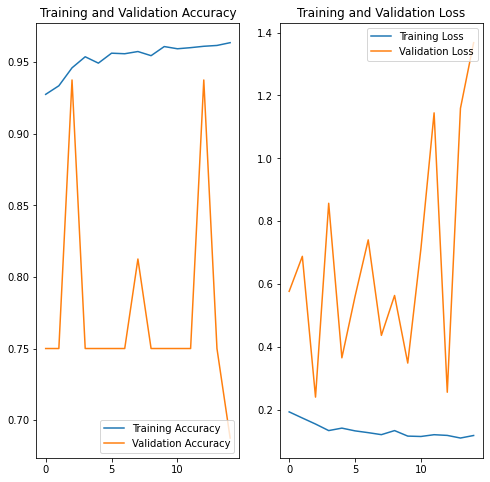

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
cd ..

/content/drive/My Drive


In [0]:
cd kaggle/

/content/drive/My Drive/kaggle


In [0]:
from tensorflow.keras.preprocessing.image import load_img
test_normal_dir = os.path.join(test_dir, 'NORMAL')
IMG = 'IM-0001-0001.jpeg'
img = load_img(test_normal_dir + '/' + IMG, target_size = (150, 150))

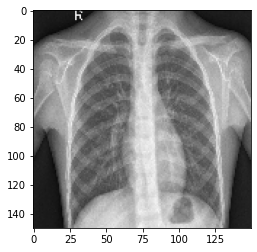

In [0]:
_=plt.imshow(img)

In [0]:
from tensorflow.keras.preprocessing.image import img_to_array
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

In [0]:
image.shape

(150, 150, 3)

In [0]:
predictions = model.predict(x, batch_size=1)

In [0]:
if(predictions[0] > 0.5):
  print("Image is normal")
else:
  print("image is pneumonia")

Image is normal
